In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
#Grab and process the raw data.
df = pd.read_csv("data/yelp_labelled.txt", delimiter= '\t', header=None)
#Add two columns.
df.columns = ['message', 'rating']
df.head()

,message,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.shape

(1000, 2)

In this bayes classifier, we are interested in finding out the rating of the Yelp review given the data (message).

In [4]:
(df['rating'] == 0).sum()

500

In [5]:
(df['rating'] == 1).sum()

500

In [6]:
df.groupby('rating').describe()

message                                               
         count unique                                top freq
rating                                                       
0          500    497  I would not recommend this place.    2
1          500    499                 I love this place.    2

In [7]:
#words = Counter(" ".join(df['message']).split()).most_common()
#words does not account for stopwords

In [8]:
words1 = " ".join(df['message']) #joined dataframe to create string
stop = set(stopwords.words('english'))
word_tokens = word_tokenize(words1) #split the text into tokens

cleaned_words = []

for word in word_tokens:
    if word.lower() not in stop and word.lower() not in string.punctuation:
        cleaned_words.append(word)

cleaned_count = Counter(cleaned_words).most_common()
cleaned_count

[('food', 113),
 ('place', 105),
 ("n't", 96),
 ('good', 89),
 ('service', 68),
 ('back', 59),
 ('great', 50),
 ('like', 46),
 ('time', 41),
 ('go', 40),
 ("'s", 40),
 ('...', 39),
 ('really', 33),
 ('would', 29),
 ('friendly', 27),
 ('ever', 25),
 ('amazing', 24),
 ('restaurant', 24),
 ('one', 24),
 ("'ve", 23),
 ('Vegas', 22),
 ('also', 22),
 ('nice', 21),
 ('came', 20),
 ('delicious', 20),
 ("'m", 20),
 ('never', 19),
 ('staff', 19),
 ('get', 19),
 ('eat', 19),
 ('us', 19),
 ('minutes', 19),
 ('Great', 19),
 ('best', 19),
 ('even', 19),
 ('could', 18),
 ('got', 18),
 ('going', 18),
 ('experience', 18),
 ('disappointed', 18),
 ('made', 17),
 ('pretty', 17),
 ('much', 17),
 ('love', 17),
 ('wo', 17),
 ('say', 16),
 ('bad', 16),
 ('think', 16),
 ('definitely', 16),
 ('Service', 15),
 ('chicken', 15),
 ('first', 15),
 ('well', 15),
 ('better', 15),
 ('menu', 14),
 ('fresh', 14),
 ('salad', 14),
 ('stars', 14),
 ('wait', 14),
 ("''", 14),
 ('want', 13),
 ('taste', 13),
 ('quality', 13),


In [13]:
keywords = ['good','great','friendly','amazing','nice','delicious','best','Great',
            'tasty','excellent','awesome','fantastic','clean','Best','impressed','happy','deal',
           'perfect','enjoy','wonderful','Good','yummy','helpful','love']
'''
['not', 'don\'t', 'no', 'never','won\'t','didn\'t',
           'wasn\'t','Not','little','wait','bad','worst','disappointed',
           'disappointment','off','slow','waited','poor','bad.','hour',
           'tasteless','barely','Never']
'''
for key in keywords:
    #Added spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

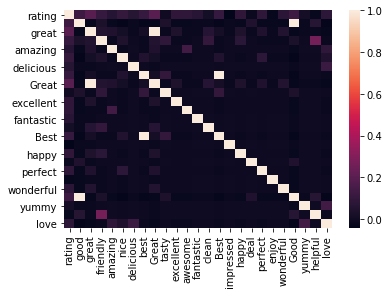

In [14]:
sns.heatmap(df.corr())

In [15]:
data = df[keywords]
target = df['rating']

In [16]:
#Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

#Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

#Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

#Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 353
